# Determine the success of an ad campaign.

In [ ]:
# Determine the success of an ad campaign.
# The dataset we have contains a total of 12 columns and 26048 observations.
# So, based on these features and observations, we will predict if a particular ad will be successful in the future or not.
# We will visualize the data and try to understand the type of ad campaigns which are more successsful and focus on those kind 
# of ads in the future or try to understand why particular ads are more successful than others.
# With these kind of insights, we can also improve the unsuccessful ones.

In [ ]:
#Data
#Data Description

#id -Unique id for each row

#ratings -Metric out of 1 which represents how much of the targeted demographic watched the advertisement

#airlocation -Country of origin

#airtime -Time when the advertisement was aired

#average_runtime(minutes_per_week) -Minutes per week the advertisement was aired

#targeted_sex -Sex that was mainly targeted for the advertisement

#genre -The type of advertisement

#industry -The industry to which the product belonged

#economic_status -The economic health during which the show aired

#relationship_status -The relationship status of the most responsive customers to the advertisement

#expensive -A general measure of how expensive the product or service is that the ad is discussing.

#money_back_guarantee -Whether or not the product offers a refund in the case of customer dissatisfaction.

#netgain [target] -Whether the ad will incur a gain or loss when sold


In [1]:
#Import the libraries.

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'


In [4]:
#Import the data
train=pd.read_csv('C:\\Users\\anju\\Desktop\\Data science misc\\datasets for practice\\Ad success/Train.csv')

In [5]:
print('total train data: ' + str(train.shape))

total train data: (26048, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [8]:
train.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [9]:
train.isnull().sum()    # No missing values found.

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [10]:
for i in train.columns:
    print( i , ':', train[i].nunique())
    

id : 26048
realtionship_status : 7
industry : 6
genre : 5
targeted_sex : 2
average_runtime(minutes_per_week) : 91
airtime : 3
airlocation : 42
ratings : 125
expensive : 3
money_back_guarantee : 2
netgain : 2


In [11]:
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [6]:
#dropping id column as its of no use
train = train.drop(['id'],axis=1)
train.head()


,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


# EDA

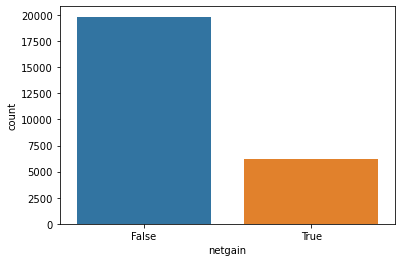

In [18]:
#Understanding the target variable netgain.
# We can see that the count of unsuccessful ads are higher.

sns.countplot('netgain',data = train) 

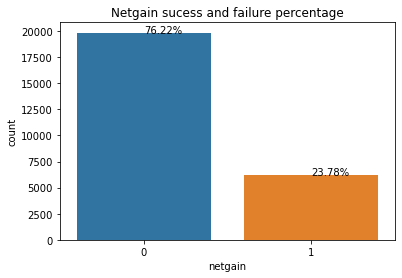

In [167]:
# Around 76% of the ad campaigns are not successful.
# 0 - False = ad campaign not successful.
# 1 - True = ad campaign successful.

total = float(len(train))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="netgain", data=train)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

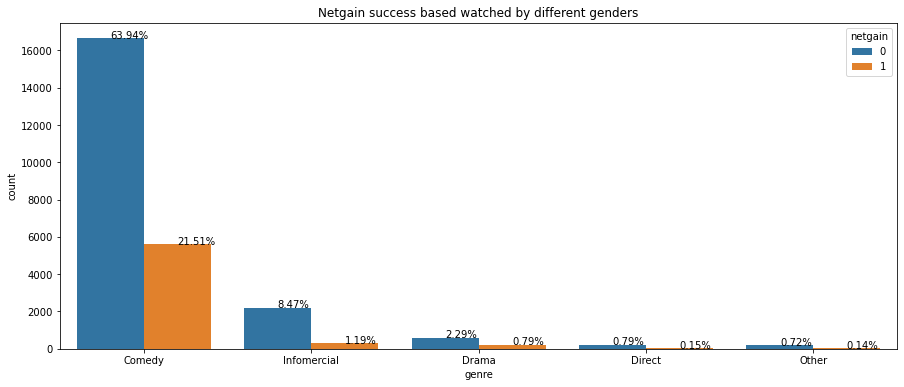

In [171]:
# 0 - false - blue colour - ad campaign not successful.
# 1 - true -  yellow colour - ad campaign successful.
# From below plot, we can infer that ads belonging to the 'comedy' genre are the most successful  amongst all the others. 
# So, Looks like people love to laugh and we can add a sigificant amount of comedy to almost every ad to make it a 
# successful one.
# However, even the comedy genre is successful only around 22% of the times.

plt.figure(figsize=(15,6))
plt.title('Netgain success based on genre')
total = float(len(train))
ax = sns.countplot(x="genre", data=train, hue = 'netgain')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

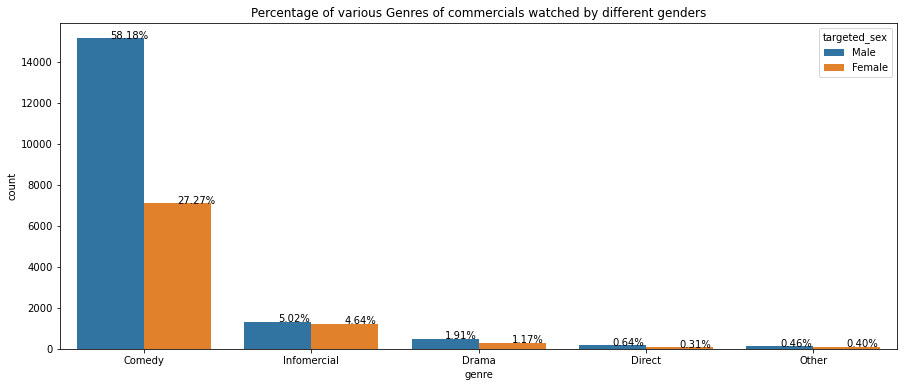

In [172]:
# Male - blue colour 
# Female-  yellow colour 
# From below plot, we can infer that males watch more ads in all the genres.
# Since the percentage of male watching ads are more in all the genres , we can make the ads more specific and interesting 
# towards the male population to make them more successful.
# We can also see that around 58% of males watch comedy ads compared to 27% of females. Do men really like comedy so much? or
# it's just that women are more busy to waste time watching ads :-P
# Also comedy genre is more famous amongst the population irrespective of gender.Looks like we need to add more humour to our ads.


plt.figure(figsize=(15,6))
plt.title('Percentage of various Genres of commercials watched by different genders')
total = float(len(train))
ax = sns.countplot(x="genre", data=train, hue = 'targeted_sex')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

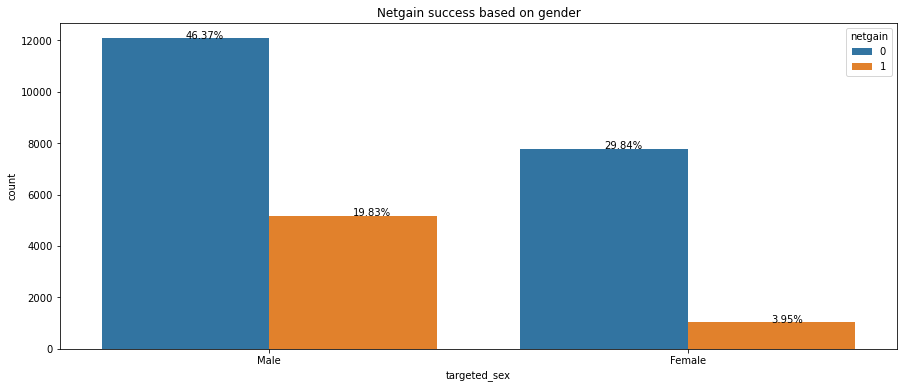

In [173]:
# 0 - false - blue colour - ad campaign not successful.
# 1 - true -  yellow colour - ad campaign successful.
# From below plot, again its clear that men watch more ads.
# However only around 20% of the ads men watch are successful whereas around 4% of the ads female watch are succcessful.

plt.figure(figsize=(15,6))
plt.title('Netgain success based on gender')
total = float(len(train))
ax = sns.countplot(x="targeted_sex", data=train , hue = 'netgain')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

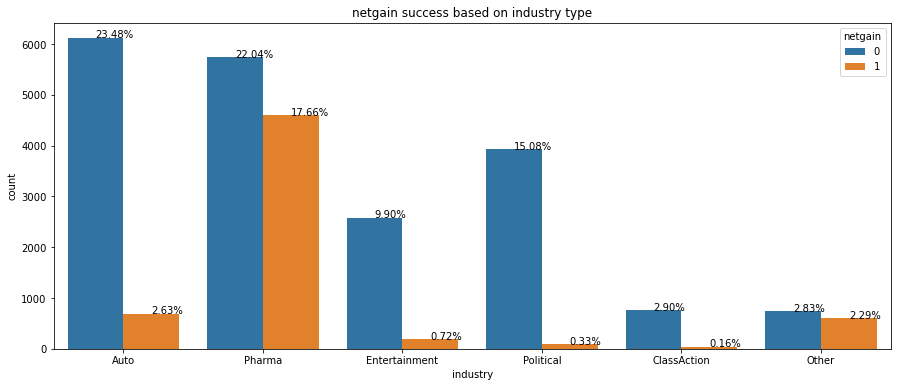

In [174]:
# 0 - false - blue colour - ad campaign not successful.
# 1 - true -  yellow colour - ad campaign successful.
# From below plot, we can clearly say that the ads related to Pharma industry are more successful. It could also be because 
# Pharma industry dominates the other sectors. lets plot it and check it out.

plt.figure(figsize=(15,6))
total = float(len(train))
plt.title('netgain success based on industry type')
ax = sns.countplot(x="industry", data=train , hue = 'netgain')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

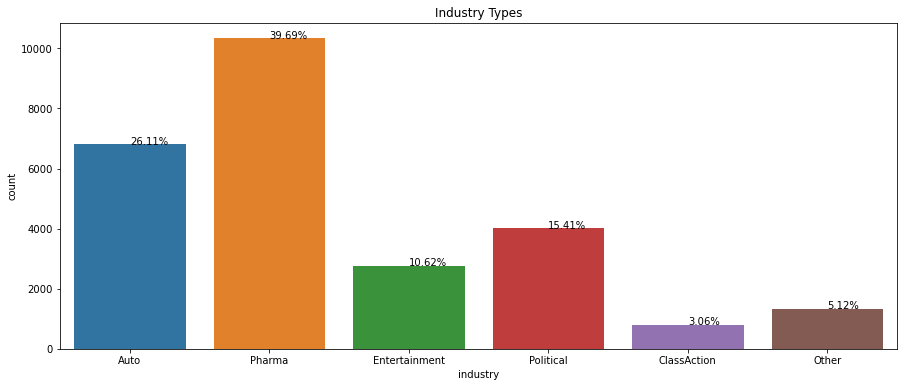

In [175]:
# As suspected above, yes Pharma industry dominates the other sectors and has the highest count of more than 10000 observations
# realted to it.Around 40% of the industry sector is contributed to Pharma industry and it also has high count of successful ads.

plt.figure(figsize=(15,6))
plt.title('Industry Types')
total = float(len(train))
ax = sns.countplot(x="industry", data=train)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

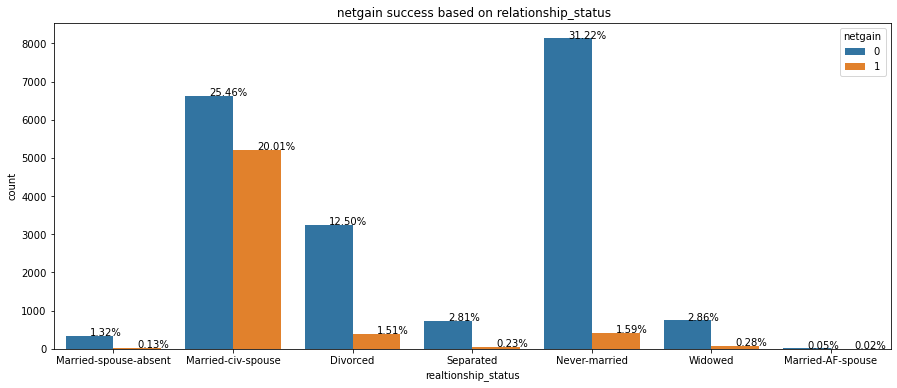

In [178]:
# 0 - false - blue colour - ad campaign not successful.
# 1 - true -  yellow colour - ad campaign successful.
# From below plot, we can clearly say that the success of the ads are more in the Married_civ_spouse category.

plt.figure(figsize=(15,6))
plt.title(' netgain success based on relationship_status')
total = float(len(train))
ax = sns.countplot(x="realtionship_status", data=train , hue = 'netgain')
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

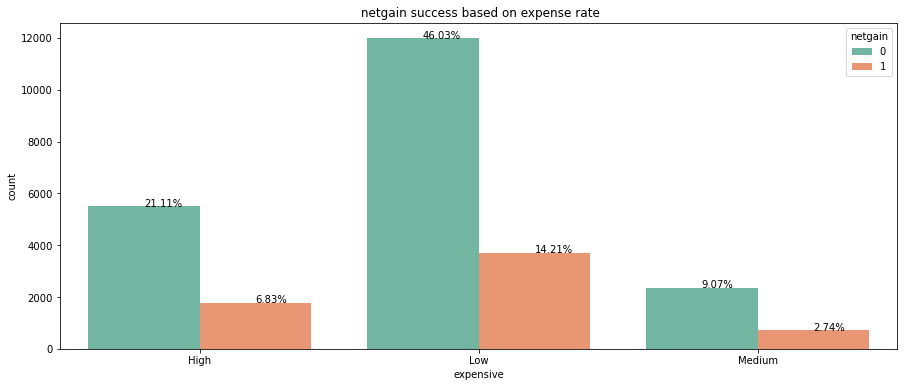

In [186]:
# 0 - false - Light blue colour - ad campaign not successful.
# 1 - true - pink colour - ad campaign successful.
# The low expensive ads are the most successful ones.

plt.figure(figsize=(15,6))
plt.title(' netgain success based on expense rate')
total = float(len(train))
ax = sns.countplot(x="expensive", data=train , hue = 'netgain' , palette="Set2")
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

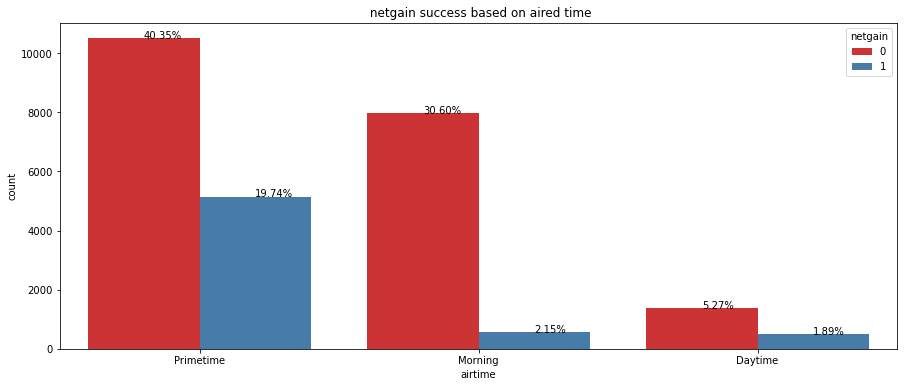

In [209]:
# 0 - false - red colour - ad campaign not successful.
# 1 - true -  blue colour - ad campaign successful.

# The ads aired during primetime are the most successful ones.
# Hence, we need to air more ads during primetime.

plt.figure(figsize=(15,6))
plt.title(' netgain success based on aired time')
total = float(len(train))
ax = sns.countplot(x="airtime", data=train , hue = 'netgain' , palette="Set1")
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2.,height + 5,
           '{:1.2f}'.format(height/total*100) + '%')

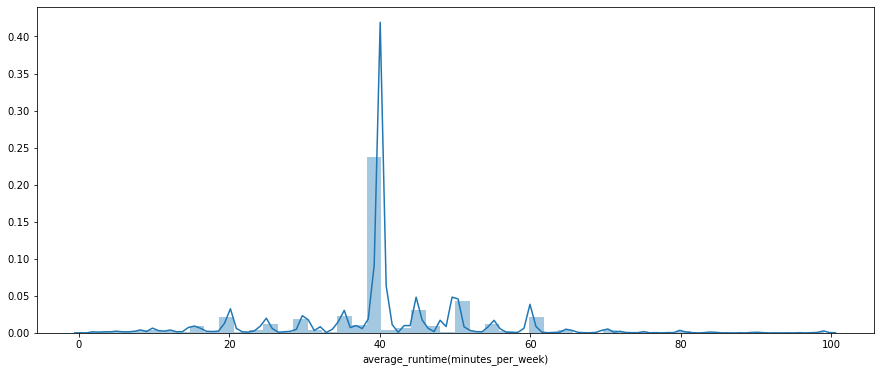

In [188]:
# We can see that the average run time of the ads per week is around 40 mins i.e the ads were aired around 40 mins per week.

plt.figure(figsize=(15,6))
sns.distplot(train['average_runtime(minutes_per_week)'])
plt.show()

<Figure size 1800x1440 with 0 Axes>

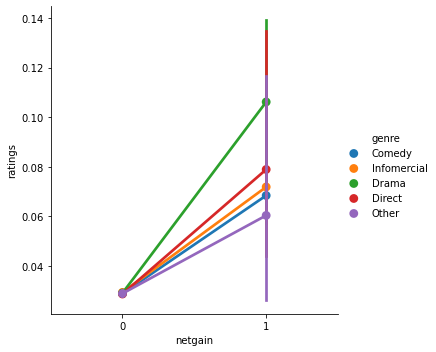

In [189]:
plt.figure(figsize=(25,20))
sns.factorplot(data=train,x='netgain',y='ratings',hue='genre')

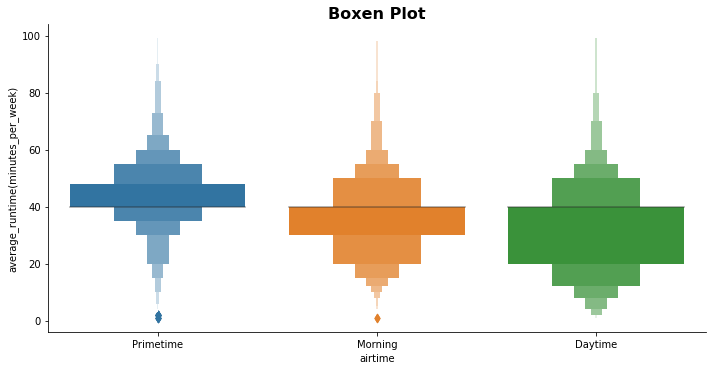

In [190]:
# Daytime ads are run more amount of time compared to the other airtimes. 

sns.catplot(x='airtime', y='average_runtime(minutes_per_week)', data=train, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

<Figure size 14400x28800 with 0 Axes>

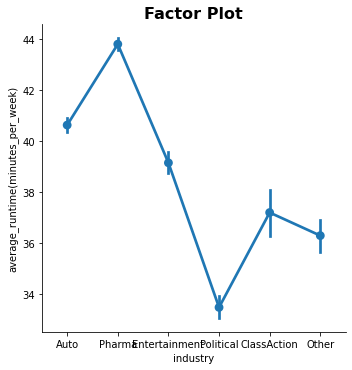

In [198]:
# Ads from pharma industry are aired more compared to others.

plt.figure(figsize=(200,400))
sns.factorplot(data=train,x='industry',y='average_runtime(minutes_per_week)')
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

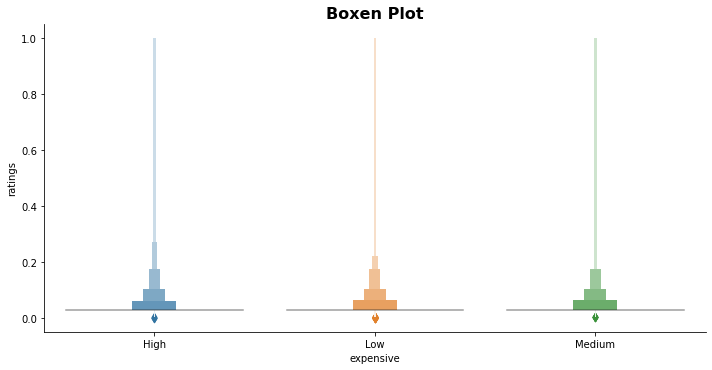

In [199]:
# High expensive ads got the highest ratings.

sns.catplot(x='expensive', y='ratings', data=train, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()


In [9]:
# Since my target variable 'netgain' is boolean , I will use label encoding for the same

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['netgain'])
print(list(le.classes_))
train['netgain'] = le.transform(train['netgain'])
train.head()

[0, 1]


,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,0
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,0
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,0
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,0
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,1


In [10]:
# My dataset has 8 categorical columns which we need to encode. Here I am using one hot encoding.

train_encode = pd.get_dummies(train)


In [11]:
train_encode.shape

(26048, 73)

In [12]:
# Splitting the independent and target variables.

train_ind = train_encode.drop(['netgain'],axis=1)
target = train_encode['netgain']


In [13]:
print( 'Train independent dataset shape:', train_ind.shape , 'and', 'Train target dataset shape:', target.shape)


Train independent dataset shape: (26048, 72) and Train target dataset shape: (26048,)


In [14]:
#Splitting the dataset to train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_ind, target, test_size=0.30, random_state=42)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (18233, 72)
y train size:  (18233,)
X test size:  (7815, 72)
y test size:  (7815,)


# Decision tree

In [41]:
# Decision tree classifier with grid seacrh CV and model evaluation using accuracy score, precision score and AUC/ROC curve.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7],'min_samples_leaf':[1,10,100],'random_state':[14]} 

clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                    

In [105]:
print('The best parameters are: ', clf.best_params_)
print('best mean cross-validated score (auc) : ', clf.best_score_)

The best parameters are:  {'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 10, 'random_state': 14}
best mean cross-validated score (auc) :  0.861220995582733


In [45]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf.predict(X_train)
precision_score_DT_train = precision_score(x_actual, x_pred)
accuracy_score_DT_train = accuracy_score(x_actual, x_pred)
print('The precision score of decision tree on TRAIN is : ',round(precision_score_DT_train * 100,2), '%')
print('The accuracy score of decision tree on TRAIN is : ',round(accuracy_score_DT_train * 100,2), '%')

The precision score of decision tree on TRAIN is :  68.06 %
The accuracy score of decision tree on TRAIN is :  82.04 %


In [46]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf.predict(X_test)
precision_score_DT_test =  precision_score(y_actual, y_pred)
accuracy_score_DT_test = accuracy_score(y_actual, y_pred)
print('The precision score of decision tree on TEST is : ',round(precision_score_DT_test * 100,2), '%')
print('The accuracy score of decision tree on TEST is : ',round(accuracy_score_DT_test * 100,2), '%')

The precision score of decision tree on TEST is :  65.81 %
The accuracy score of decision tree on TEST is :  81.46 %


In [47]:
# Among all predictions for ad to be successful, 65.8% are successful.
# 81.5 % of the succcessful ads were predicted correctly.

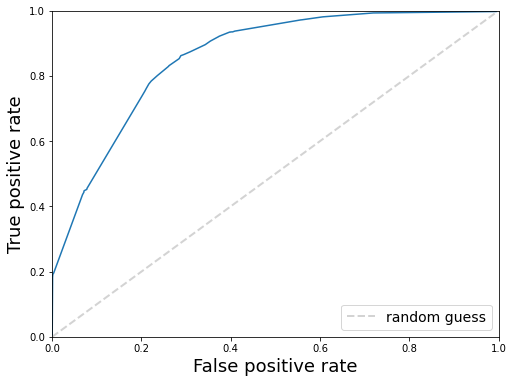

DT AUC is:  85.84 %


In [113]:
#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('DT AUC is: ', round(AUC_DT * 100,2), '%')

In [51]:
 #getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

Confusion Matrix TRAIN:
 [[12925   954]
 [ 2321  2033]]

Confusion Matrix TEST:
 [[5550  424]
 [1025  816]]


In [54]:
# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     13879
           1       0.68      0.47      0.55      4354

    accuracy                           0.82     18233
   macro avg       0.76      0.70      0.72     18233
weighted avg       0.81      0.82      0.81     18233


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      5974
           1       0.66      0.44      0.53      1841

    accuracy                           0.81      7815
   macro avg       0.75      0.69      0.71      7815
weighted avg       0.80      0.81      0.80      7815



# Random Forest

In [49]:

from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [115]:
print('The best parameters are: ', clf1.best_params_)
print('best mean cross-validated score (auc) : ', clf1.best_score_)

The best parameters are:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 14}
best mean cross-validated score (auc) :  0.867827686507708


In [50]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf1.predict(X_train)
precision_score_RF_train = precision_score(x_actual, x_pred)
accuracy_score_RF_train = accuracy_score(x_actual, x_pred)
print('The precision score of random forest on TRAIN is : ',round(precision_score_RF_train * 100,2), '%')
print('The accuracy score of random forest on TRAIN is : ',round(accuracy_score_RF_train * 100,2), '%')

The precision score of random forest on TRAIN is :  70.34 %
The accuracy score of random forest on TRAIN is :  82.41 %


In [51]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf1.predict(X_test)
precision_score_RF_test =  precision_score(y_actual, y_pred)
accuracy_score_RF_test = accuracy_score(y_actual, y_pred)
print('The precision score of random forest on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score of random forest on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

The precision score of random forest on TEST is :  67.32 %
The accuracy score of random forest on TEST is :  81.66 %


In [ ]:
# Among all predictions for ad to be successful, 65.8% are successful.
# 81.5 % of the succcessful ads were predicted correctly.

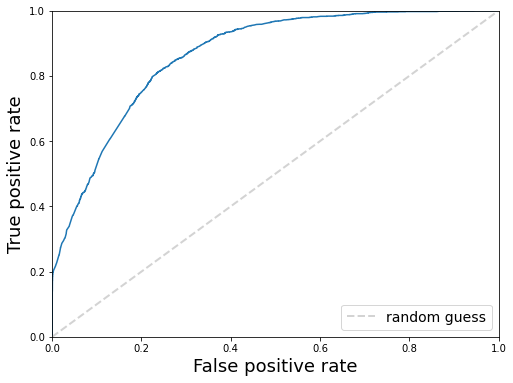

RF AUC is:  86.53 %


In [118]:
#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf1.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')


In [68]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

Confusion Matrix TRAIN:
 [[13043   836]
 [ 2371  1983]]

Confusion Matrix TEST:
 [[5589  385]
 [1048  793]]


In [69]:
# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     13879
           1       0.70      0.46      0.55      4354

    accuracy                           0.82     18233
   macro avg       0.77      0.70      0.72     18233
weighted avg       0.81      0.82      0.81     18233


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      5974
           1       0.67      0.43      0.53      1841

    accuracy                           0.82      7815
   macro avg       0.76      0.68      0.71      7815
weighted avg       0.80      0.82      0.80      7815



# Voting Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)
#nbclf = GaussianNB(random_state=0)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [53]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf2.predict(X_train)
precision_score_VC_train = precision_score(x_actual, x_pred)
accuracy_score_VC_train = accuracy_score(x_actual, x_pred)
print('The precision score of Voting classifier on TRAIN is : ',round(precision_score_VC_train * 100,2), '%')
print('The accuracy score of Voting classifier on TRAIN is : ',round(accuracy_score_VC_train * 100,2), '%')

The precision score of Voting classifier on TRAIN is :  71.46 %
The accuracy score of Voting classifier on TRAIN is :  82.54 %


In [54]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf2.predict(X_test)
precision_score_VC_test = precision_score(y_actual, y_pred)
accuracy_score_VC_test = accuracy_score(y_actual, y_pred)
print('The precision score of Voting classifier on Test is : ',round(precision_score_VC_test * 100,2), '%')
print('The accuracy score of Voting classifier on Test is : ',round(accuracy_score_VC_test * 100,2), '%')

The precision score of Voting classifier on Test is :  62.79 %
The accuracy score of Voting classifier on Test is :  80.27 %


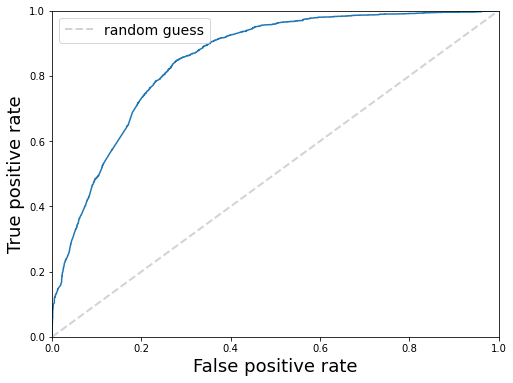

VC AUC is:  84.92 %


In [122]:
#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf2.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_VC = auc(fpr,tpr)
print('VC AUC is: ', round(AUC_VC * 100,2), '%')


In [90]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

Confusion Matrix TRAIN:
 [[13101   778]
 [ 2406  1948]]

Confusion Matrix TEST:
 [[5539  435]
 [1107  734]]


In [91]:
# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     13879
           1       0.71      0.45      0.55      4354

    accuracy                           0.83     18233
   macro avg       0.78      0.70      0.72     18233
weighted avg       0.81      0.83      0.81     18233


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      5974
           1       0.63      0.40      0.49      1841

    accuracy                           0.80      7815
   macro avg       0.73      0.66      0.68      7815
weighted avg       0.79      0.80      0.79      7815



# Boosting algorithm - XGBoost

In [55]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)
    
xgb_clf.fit(X_train,y_train)
    
    

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, xgb_clf.predict(X_train)
precision_score_XG_train = precision_score(x_actual, x_pred)
accuracy_score_XG_train = accuracy_score(x_actual, x_pred)
print('The precision score of XGBOOST on TRAIN is : ',round(precision_score_XG_train * 100,2), '%')
print('The accuracy score of XGBOOST on TRAIN is : ',round(accuracy_score_XG_train * 100,2), '%')

The precision score of XGBOOST on TRAIN is :  69.5 %
The accuracy score of XGBOOST on TRAIN is :  82.32 %


In [57]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, xgb_clf.predict(X_test)
precision_score_XG_test = precision_score(y_actual, y_pred)
accuracy_score_XG_test = accuracy_score(y_actual, y_pred)
print('The precision score of XGBOOST on Test is : ',round(precision_score_XG_test * 100,2), '%')
print('The accuracy score of XGBOOST on Test is : ',round(accuracy_score_XG_test * 100,2), '%')

The precision score of XGBOOST on Test is :  67.57 %
The accuracy score of XGBOOST on Test is :  81.91 %


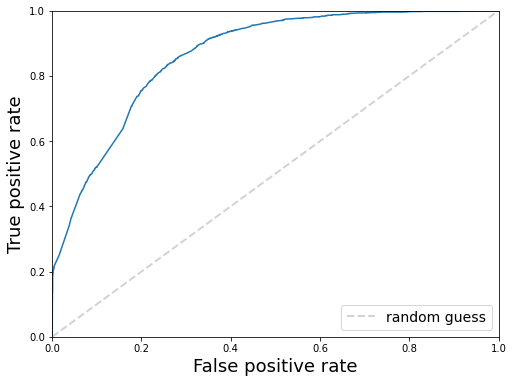

XG AUC is:  86.46 %


In [126]:
#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = xgb_clf.predict_proba(X_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_XG = auc(fpr,tpr)
print('XG AUC is: ', round(AUC_XG * 100,2), '%')

In [99]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('Confusion Matrix TRAIN:\n', confusion_matrix(y_train,x_pred))
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))

Confusion Matrix TRAIN:
 [[12995   884]
 [ 2340  2014]]

Confusion Matrix TEST:
 [[5580  394]
 [1020  821]]


In [100]:
# getting the classification report of the classification models
from sklearn.metrics import classification_report 
print ('Classification Report TRAIN:\n', classification_report(y_train,x_pred))
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

Classification Report TRAIN:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     13879
           1       0.69      0.46      0.56      4354

    accuracy                           0.82     18233
   macro avg       0.77      0.70      0.72     18233
weighted avg       0.81      0.82      0.81     18233


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      5974
           1       0.68      0.45      0.54      1841

    accuracy                           0.82      7815
   macro avg       0.76      0.69      0.71      7815
weighted avg       0.81      0.82      0.81      7815



# Reporting the accuracy of all the data models used for prediction.

In [62]:
print('The ACCURACY SCORE of various models on train and test are:')
print('                                                         ')
print('The accuracy score of decision tree on : \t\t\t\t\t\tTRAIN:',round(accuracy_score_DT_train * 100,2), '\b%','\tTEST:',round(accuracy_score_DT_test * 100,2), '\b%')
print('The accuracy score of random forest ensembler on: \t\t\t\t\tTRAIN:',round(accuracy_score_RF_train * 100,2), '\b%','\tTEST:',round(accuracy_score_RF_test * 100,2), '\b%')
print('The accuracy score of multiple different classifiers - Voting classifier on: \t\tTRAIN:',round(accuracy_score_VC_train * 100,2), '\b%','\tTEST:',round(accuracy_score_VC_test * 100,2), '\b%')
print('The accuracy score of boosting model XGBOOST on: \t\t\t\t\tTRAIN:',round(accuracy_score_XG_train * 100,2), '\b%','\tTEST:',round(accuracy_score_XG_test * 100,2), '\b%')
print('The accuracy score of single logistic regression classifier on: \t\t\tTRAIN:',round(accuracy_score_LG_train * 100,2), '\b%','\tTEST:',round(accuracy_score_LG_test * 100,2), '\b%')
print('The accuracy score of multiple logistic regression classifier on:\t\t\tTRAIN:',round(accuracy_score_MLG_train * 100,2), '\b%','\tTEST:',round(accuracy_score_MLG_test * 100,2), '\b%')

The ACCURACY SCORE of various models on train and test are:
                                                         
The accuracy score of decision tree on : 						TRAIN: 82.04 % 	TEST: 81.46 %
The accuracy score of random forest ensembler on: 					TRAIN: 82.41 % 	TEST: 81.66 %
The accuracy score of multiple different classifiers - Voting classifier on: 		TRAIN: 82.54 % 	TEST: 80.27 %
The accuracy score of boosting model XGBOOST on: 					TRAIN: 82.32 % 	TEST: 81.91 %
The accuracy score of single logistic regression classifier on: 			TRAIN: 79.92 % 	TEST: 79.65 %
The accuracy score of multiple logistic regression classifier on:			TRAIN: 80.21 % 	TEST: 79.81 %


In [63]:
print('The PRECISION SCORE of various models on train and test are:')
print('                                                         ')
print('The precision score of decision tree on : \t\t\t\t\t\tTRAIN:',round(precision_score_DT_train * 100,2), '\b%','\tTEST:',round(precision_score_DT_test * 100,2), '\b%')
print('The precision score of random forest ensembler on: \t\t\t\t\tTRAIN:',round(precision_score_RF_train * 100,2), '\b%','\tTEST:',round(precision_score_RF_test * 100,2), '\b%')
print('The precision score of multiple different classifiers - Voting classifier on: \t\tTRAIN:',round(precision_score_VC_train * 100,2), '\b%','\tTEST:',round(precision_score_VC_test * 100,2), '\b%')
print('The precision score of boosting model XGBOOST on: \t\t\t\t\tTRAIN:',round(precision_score_XG_train * 100,2), '\b%','\tTEST:',round(precision_score_XG_test * 100,2), '\b%')
print('The precision score of single logistic regression classifier on: \t\t\tTRAIN:',round(precision_score_LG_train * 100,2), '\b%','\tTEST:',round(precision_score_LG_test * 100,2), '\b%')
print('The precision score of multiple logistic regression classifier on: \t\t\tTRAIN:',round(precision_score_MLG_train * 100,2), '\b%','\tTEST:',round(precision_score_MLG_test * 100,2), '\b%')


The PRECISION SCORE of various models on train and test are:
                                                         
The precision score of decision tree on : 						TRAIN: 68.06 % 	TEST: 65.81 %
The precision score of random forest ensembler on: 					TRAIN: 70.34 % 	TEST: 67.32 %
The precision score of multiple different classifiers - Voting classifier on: 		TRAIN: 71.46 % 	TEST: 62.79 %
The precision score of boosting model XGBOOST on: 					TRAIN: 69.5 % 	TEST: 67.57 %
The precision score of single logistic regression classifier on: 			TRAIN: 62.01 % 	TEST: 59.98 %
The precision score of multiple logistic regression classifier on: 			TRAIN: 63.75 % 	TEST: 61.27 %


In [155]:
print('The AUC SCORE of various models on test are:')
print('                                                         ')
print('The AUC score of decision tree on : \t\t\t\t\t\t\tTest:',round(AUC_DT * 100,2), '%', '\b%')
print('The AUC score of random forest ensembler on: \t\t\t\t\t\tTest:',round(AUC_RF * 100,2), '%', '\b%')
print('The AUC score of multiple different classifiers - Voting classifier on: \t\tTest:',round(AUC_VC * 100,2), '%', '\b%')
print('The AUC score of boosting model XGBOOST on: \t\t\t\t\t\tTest:',round(AUC_XG * 100,2), '%', '\b%')


The AUC SCORE of various models on test are:
                                                         
The AUC score of decision tree on : 							Test: 85.84 % %
The AUC score of random forest ensembler on: 						Test: 86.53 % %
The AUC score of multiple different classifiers - Voting classifier on: 		Test: 84.92 % %
The AUC score of boosting model XGBOOST on: 						Test: 86.46 % %


In [44]:
print('The AUC score of single logistic regreesion classifier on: \t\t\tTest:',round(AUC_logsin * 100,2), '%', '\b%')
print('The AUC score of multiple logistic regreesion classifiers on: \t\t\tTest:',round(AUC_MLOG * 100,2), '%', '\b%')

The AUC score of single logistic regreesion classifier on: 			Test: 83.84 % %
The AUC score of multiple logistic regreesion classifiers on: 			Test: 84.44 % %


In [ ]:
# Hence, we can say that boosting algorithm XGBoost performed the best on our dataset. It will predict most precisely the 
# success of the ad campaign.

# Single SVM

In [87]:
# Single SVM
from sklearn.svm import SVC
svmClf = SVC(probability=True)
svmClf.fit(X_train, y_train)

y_pred = svmClf.predict(X_test)


In [79]:
print('precision of single SVM on the test set: ', round(precision_score(y_test, y_pred)*100,2),'%')
print('accuracy of single SVM on the test set: ', round(accuracy_score(y_test, y_pred)*100,2),'%')

precision of single SVM on the test set:  0.0 %
accuracy of single SVM on the test set:  76.44 %


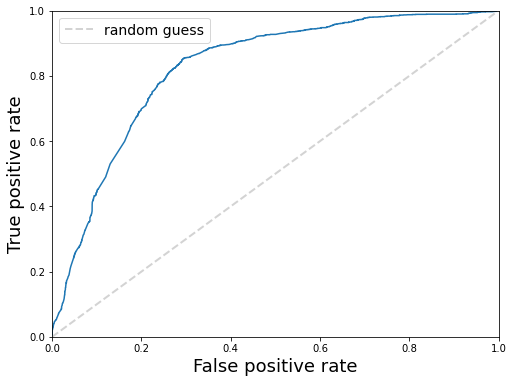

AUC for single SVM is:  82.5 %


In [80]:
svmprob = svmClf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svmprob)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

print('AUC for single SVM is: ', round(auc(fpr,tpr)*100,2),'%')



In [88]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('\nConfusion Matrix of single SVM TEST:\n', confusion_matrix(y_test,y_pred))


Confusion Matrix of single SVM TEST:
 [[5974    0]
 [1841    0]]


In [89]:
from sklearn.metrics import classification_report 
print ('\nClassification Report of single SVM TEST:\n', classification_report(y_test,y_pred))


Classification Report of single SVM TEST:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      5974
           1       0.00      0.00      0.00      1841

    accuracy                           0.76      7815
   macro avg       0.38      0.50      0.43      7815
weighted avg       0.58      0.76      0.66      7815



# Ensemble of multiple SVM using bagging classifier.

In [81]:
#Ensemble of multiple SVM using bagging classifier.

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svmClfbag = BaggingClassifier(SVC(C=1.0, kernel='linear', degree=5, gamma='auto', coef0=0.0, shrinking=True, probability=True,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None))
svmClfbag.fit(X_train, y_train)

#print(svmClfbag.oob_score_)

y_pred = svmClfbag.predict(X_test)



In [82]:
print('precision of multiple SVM  on the test set: ', round(precision_score(y_test, y_pred)*100,2),'%')
print('accuracy of multiple SVM on the test set: ', round(accuracy_score(y_test, y_pred)*100,2),'%')

precision of multiple SVM  on the test set:  74.47 %
accuracy of multiple SVM on the test set:  79.97 %


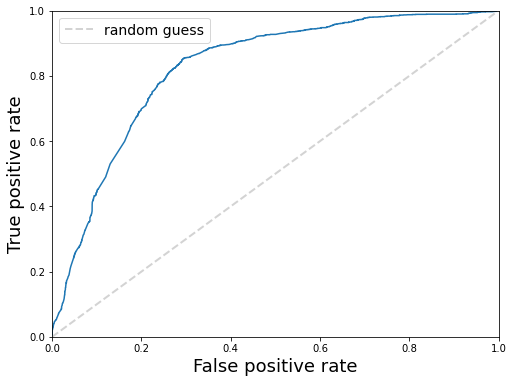

AUC for multiple SVM - Bagging Classifier is:  82.5 %


In [83]:
svmprobbag = svmClf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svmprobbag)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

print('AUC for multiple SVM - Bagging Classifier is: ', round(auc(fpr,tpr)*100,2),'%')


In [85]:
#getting the confusion matrix for the classification model
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
print ('\nConfusion Matrix TEST:\n', confusion_matrix(y_test,y_pred))


Confusion Matrix TEST:
 [[5830  144]
 [1421  420]]


In [86]:
from sklearn.metrics import classification_report 
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5974
           1       0.74      0.23      0.35      1841

    accuracy                           0.80      7815
   macro avg       0.77      0.60      0.62      7815
weighted avg       0.79      0.80      0.76      7815



# Single Logistic Regression Classifier


In [30]:
#Single Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, solver='lbfgs') 
log.fit(X_train, y_train)

y_pred = log.predict(X_test)


In [31]:
from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, log.predict(X_train)
precision_score_LG_train = precision_score(x_actual, x_pred)
accuracy_score_LG_train = accuracy_score(x_actual, x_pred)
print('precision of single logistic regression classifier on the train set:',round(precision_score_LG_train * 100,2), '%')
print('accuracy of single logistic regression classifier on the train set: ',round(accuracy_score_LG_train * 100,2), '%')

precision of single logistic regression classifier on the train set: 62.01 %
accuracy of single logistic regression classifier on the train set:  79.92 %


In [32]:
from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, log.predict(X_test)
precision_score_LG_test = precision_score(y_actual, y_pred)
accuracy_score_LG_test = accuracy_score(y_actual, y_pred)
print('precision of single logistic regression classifier on the test set:',round(precision_score_LG_test * 100,2), '%')
print('accuracy of single logistic regression classifier on the test set: ',round(accuracy_score_LG_test * 100,2), '%')


precision of single logistic regression classifier on the test set: 59.98 %
accuracy of single logistic regression classifier on the test set:  79.65 %


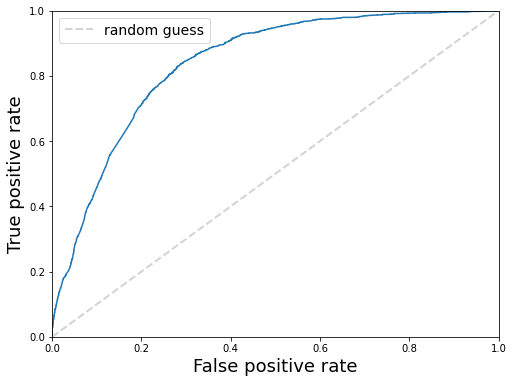

single Logistic regression AUC is:  83.84 %


In [19]:
logauc = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logauc)

plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_logsin = auc(fpr,tpr)
print('single Logistic regression AUC is: ', round(AUC_logsin *100,2),'%')


# Multiple logistic regression classifiers using bagging Classifier

In [33]:
# Multiple logistic regression classifiers using bagging Claissifier.
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 400, oob_score = True, random_state = 90)
logbagClf.fit(X_train, y_train)


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=400, n_jobs=None,
                  oob_score=True, random_state=90, verb

In [21]:
print('OOB score of an ensemble of multiple logistic regression classifiers:', round((logbagClf.oob_score_)*100,2),'%')

# The oob score is an actual estimate of the accuracy of the ensemble classifier 

OOB score of an ensemble of multiple logistic regression classifiers: 80.06 %


In [34]:

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, logbagClf.predict(X_train)
precision_score_MLG_train = precision_score(x_actual, x_pred)
accuracy_score_MLG_train = accuracy_score(x_actual, x_pred)
print('precision of multiple logistic regression classifier on the train set:',round(precision_score_MLG_train * 100,2), '%')
print('accuracy of multiple logistic regression classifier on the train set: ',round(accuracy_score_MLG_train * 100,2), '%')


precision of multiple logistic regression classifier on the train set: 63.75 %
accuracy of multiple logistic regression classifier on the train set:  80.21 %


In [35]:

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, logbagClf.predict(X_test)
precision_score_MLG_test = precision_score(y_actual, y_pred)
accuracy_score_MLG_test = accuracy_score(y_actual, y_pred)
print('precision of multiple logistic regression classifier on the test set:',round(precision_score_MLG_test * 100,2), '%')
print('accuracy of multiple logistic regression classifier on the test set: ',round(accuracy_score_MLG_test * 100,2), '%')


precision of multiple logistic regression classifier on the test set: 61.27 %
accuracy of multiple logistic regression classifier on the test set:  79.81 %


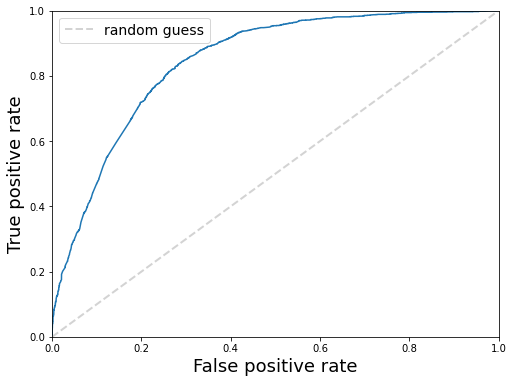

AUC of baggingclassifier of logistic regression classifiers is:  84.44 %


In [27]:
#AUC score
logbag = logbagClf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, logbag)
plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_MLOG = auc(fpr,tpr)
print('AUC of baggingclassifier of logistic regression classifiers is: ', round(AUC_MLOG*100,2),'%')
